# **PRACTICA 11:**
## **Redes Neuronales de Funciones de Base Radial (RBF) y Máquinas de Vectores Soporte (SVM)**
---
### Marta Jiménez Pacheco

Con el conjunto de datos de “breast_cancer” que incorpora “sklearn”,  construya una RBF, donde la capa de salida es sustituida por una máquina  de Vectores Soporte de función núcleo polinómica. Los experimentos se  harán con Validación Cruzada de 10 carpetas.
La primera incógnita que surge, es el número de neuronas de la capa oculta. Para ello, se ha de experimentar variando este parámetro entre 2 y 30. En  cada prueba, se etiquetarán los clúster aplicando el criterio de la moda (ver  ejemplo de Kmeans con IRIS en el moodle de la asignatura) y evaluando los  aciertos con las muestras de test con las diferentes carpetas de test que  van surgiendo. No se olvide de hacer la media de esta tasa de aciertos,  porque es lo que habrá que representar en función del número de clústeres  y hallar la máxima tasa de aciertos, para obtener, así, el número de  clústeres óptimo.

Importamos los datos y las librerias necesarios.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#kmedias - RBF
from sklearn.cluster import KMeans
from scipy.stats import mode
#una vez que sabemos cuantos cluster usar y hemos entrenado al modelo calculamos
#la distancia euclidea
from sklearn.metrics.pairwise import euclidean_distances

#Support Vector Machine
from sklearn import svm
from sklearn.svm import LinearSVC,SVC

In [2]:
cancer = load_breast_cancer()
Y = cancer.target
X = MinMaxScaler().fit_transform(cancer.data)
X.shape, Y.shape
min_clusters = np.unique(Y).shape[0]
print(min_clusters)

2


In [3]:
#Visualizar los datos en una tabla
tabla=pd.DataFrame(X,columns=cancer.feature_names)
tabla['Class']=Y
tabla.shape

(569, 31)

Vamos a realizar una validacion cruzada  de 10 folds para elegir el número de neuronas. 

In [4]:
min_clusters = 2 #min_clusters = np.unique(Y).shape[0] # == 2
max_clusters = 30

tabla = pd.DataFrame(columns=['n_clusters', 'aciertos_train', 'aciertos_test'])
K=10
kf = KFold(n_splits=K)

### Probamos con diferente numero de clusters y predecimos con la moda para ver cual tiene mayor porcentaje de aciertos

In [5]:
f=0

for c in range(2,max_clusters+1):#el numero de cluster variara de 2 a 30 
    aciertos_train = np.array([])
    aciertos_test = np.array([])
    
    for train_index, test_index in kf.split(X,Y):

        #hacemos las k-medias con el numero de cluster de cada iteracion
        kmedias = KMeans(n_clusters=c, random_state=0)
        
        # Cogemos nuestras muestras de test y entrenamiento
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        # Ajustamos las k-medias
        kmedias.fit(X_train)
        
        # Usamos el criterio de la moda
        moda = -1 * np.ones(c, dtype='int') 
        for i in range(c):
            moda[i] = mode(Y_train[np.argwhere(kmedias.labels_ == i)])[0].astype(int)
            #cogemos los indices de la clase que coinciden con el numero de clusters
        
        y_test_predict = moda[kmedias.predict(X_test)]
        y_train_predict = moda[kmedias.predict(X_train)]
        aciertos_train = np.append(aciertos_train, accuracy_score(Y_train, y_train_predict))
        aciertos_test = np.append(aciertos_test, accuracy_score(Y_test, y_test_predict))
    
    tabla.loc[f] = [c, aciertos_train.mean() ,  aciertos_test.mean()]
    f+=1

tabla

,n_clusters,aciertos_train,aciertos_test
0,2.0,0.927750,0.922744
1,3.0,0.901192,0.903415
2,4.0,0.906657,0.889380
3,5.0,0.923845,0.922713
4,6.0,0.895142,0.882362
5,7.0,0.907832,0.912187
6,8.0,0.918177,0.889348
7,9.0,0.924236,0.903383
8,10.0,0.930487,0.931485
9,11.0,0.934199,0.913784


Hacemos un grafico de las tasas de acierto de los numero de cluster.

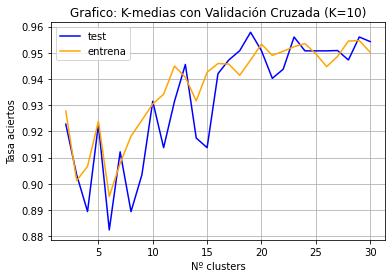

In [6]:
import matplotlib.pyplot as plt

n = np.arange(2,31,dtype='int')  
                                  
plt.plot(n,tabla.aciertos_test,color='blue',label='test') #label es para legend
plt.plot(n,tabla.aciertos_train,color='orange',label='entrena')
plt.legend()
plt.title("Grafico: K-medias con Validación Cruzada (K=10)")
plt.xlabel("Nº clusters")
plt.ylabel("Tasa aciertos")
plt.grid()
plt.show()

Obtengo el maximo de la tasa de aciertos y veo  que numero de cluster son necesarios 

In [7]:
aciertos_test=tabla.aciertos_test.to_numpy()
n_optimo=aciertos_test.max()
n_neuronas=np.argwhere(aciertos_test==n_optimo) + 2

print("Valor maximo de aciertos es ",n_optimo, "\nNumero de neuronas en la capa oculta =",n_neuronas)


Valor maximo de aciertos es  0.9578634085213033 
Numero de neuronas en la capa oculta = [[19]]


### **Entreno la red RBF y calculo la salida de la capa oculta para usarla como entrada de SVM**
  
 Lo primero que debemos realizar es separar la muestra en entrenamiento y test

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, stratify=Y, random_state=0)

In [9]:
X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((379, 30), (190, 30), (379,), (190,))

In [10]:
#ahora ya sabemos el número optimo de clusters que tenemos que usar
kmedias = KMeans(n_clusters=n_neuronas).fit(X_train)
centros = kmedias.cluster_centers_

distancias = euclidean_distances(centros)
print(distancias.shape)
print(centros.shape)
sigma = np.sum(distancias, axis=0)/(centros.shape[0]-1)

TypeError: only integer scalar arrays can be converted to a scalar index

###### Salida capa OCULTA datos entrenamiento

In [ ]:
X_mlp_train = np.zeros((X_train.shape[0], centros.shape[0]), dtype=float)
for i in range(X_train.shape[0]):
    for j in range(centros.shape[0]):
        X_mlp_train[i][j]=np.exp(-sum((X_train[i]-centros[j])**2)/(2.0*(sigma[j]**2)))

###### Salida capa OCULTA para los test

In [ ]:
X_mlp_test = np.zeros((X_test.shape[0], centros.shape[0]), dtype=float)
for i in range(X_test.shape[0]):
    for j in range(centros.shape[0]):
        X_mlp_test[i][j] = np.exp(-sum((X_test[i]-centros[j])**2)/(2.0*(sigma[j]**2)))

In [ ]:
X_mlp_test = np.zeros((X_test.shape[0], centros.shape[0]), dtype=float)
for i in range(X_test.shape[0]):
    for j in range(centros.shape[0]):
        X_mlp_test[i][j] = np.exp(-sum((X_test[i]-centros[j])**2)/(2.0*(sigma[j]**2)))

###### Ajuste de la capa de salida y predicion

## Creo el suport vector machine polinomico 

#### Realizo el SVM con las predicciones de salidas del MLP

In [ ]:
#el clasificador 
clfSVC = SVC()
clfSVC = SVC(kernel='poly',degree=3) #gamma scale (por defecto)
clfSVC

In [ ]:
#ajuste
clfSVC.fit(X_mlp_train,Y_train)
#prediccion  de clase segun el super vector machine 
predi=clfSVC.predict(X_mlp_test)
#calculo de las tasa de acierto
tasa = (predi == Y_test).mean()
print("SVM , aciertos para train = ", tasa,"\n")

 Si aplicara el procedimiento super vector machine sobre los datos directamente (unicamente tras el normalizado y division en train y test)  para ver como separaria . Ver cuanto acertaria el metodo.

In [ ]:
#ajuste que , luego habra que modificar para el que sea 
clfSVC.fit(X_train,Y_train)
#predicciones 
predi=clfSVC.predict(X_test)
#calculo de la tasa de acierto
tasa= (predi == Y_test).mean() 
print("Aciertos para los datos  reales",tasa)